## KNN Classifier

In [1]:
import numpy as np
import pandas as pd
from statistics import mode

In [2]:
class KNN:
    def __init__(self, metric, k):
        self.metric = metric
        self.k = k

    def fit(self, X_train, y_train):
        self.X = X_train
        self.y = y_train

    def predict(self, sample):
        distance = []

        for x in self.X.values:
            if self.metric == "eucledian" or self.metric == "e":
                distance.append(np.sqrt(((sample - x) ** 2).sum()))
            elif self.metric == "manhattan" or self.metric == "m":
                distance.append(abs(sample - x).sum())
        
        indices = np.argsort(distance)[:self.k]
        nearest_labels = [y_train.iloc[i] for i in indices]
        
        return mode(np.array(nearest_labels))

    def score(self, X_test, y_test):
        predicted = []

        for x in X_test.values:
            predicted.append(self.predict(x))

        predicted = pd.Series(predicted)
        actual = pd.Series(y_test.values)
        num = (predicted == actual).sum()
        total = len(actual)

        return (num / total)

<hr>

## Iris Dataset

In [3]:
from sklearn.datasets import load_iris

data = load_iris(as_frame=True)

features = data.data
target = data.target

## Splitting Dataset for Cross Validation

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=20)

<hr>

## Self Implemented KNN 

In [5]:
knn = KNN(metric = 'e', k = 10)

knn.fit(X_train, y_train)

knn.score(X_test, y_test)

0.9736842105263158

## Sklearn KNN

In [6]:
from sklearn.neighbors import KNeighborsClassifier

sklearn_knn = KNeighborsClassifier(metric='euclidean', n_neighbors=10)

sklearn_knn.fit(X_train, y_train)

sklearn_knn.score(X_test, y_test)

0.9736842105263158

<hr>

## Comparison

In [7]:
import matplotlib.pyplot as plt

In [8]:
self_scores = []
for k in range(1,41):
    self_scores.append(knn.score(X_test, y_test))

sklearn_scores = []
for k in range(1,41):
    sklearn_scores.append(sklearn_knn.score(X_test, y_test))

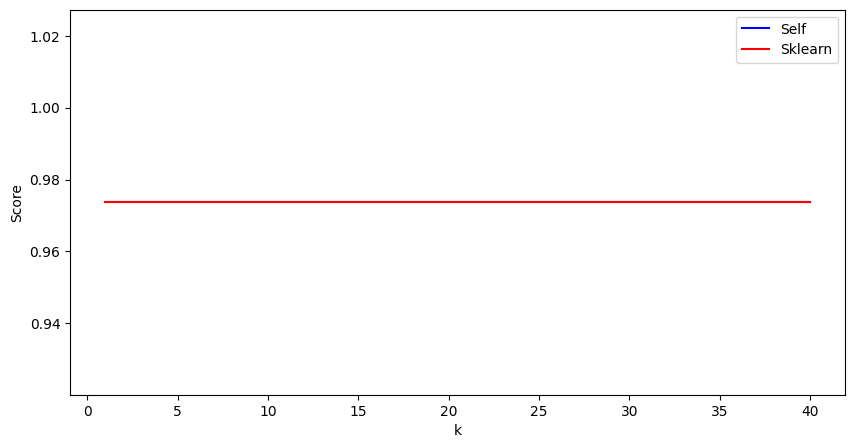

In [9]:
plt.figure(figsize=(10,5))

plt.plot(range(1,41), self_scores, color="b")
plt.plot(range(1,41), sklearn_scores, color="r")
plt.legend(["Self", "Sklearn"])
plt.ylabel("Score")
plt.xlabel("k")

plt.show()